# Content
01.09.2025
## 1. Sales
1.1 [EDA](https://colab.research.google.com/drive/1io5VNWHmiDmn_rg9bKa1j0H6LqDNS4NR)  
1.2 [SPC](https://colab.research.google.com/drive/1PbqfbITrbjdQzJAGWF3PSCasTG7g7Wzy#scrollTo=3ON5yj9YfXxk)  
1.3 [FC](https://colab.research.google.com/drive/1hu78fzV_VS4bXGMnkidhgh9fPP1kFGWl#scrollTo=PeJZJm4YYtJ5)  
1.4 [Feature Engineering and RFM](https://colab.research.google.com/drive/1h28pnMQc8uKE8WTVBPwbWj7R1Tv3dx34)  
1.5 [Dashboard](https://colab.research.google.com/drive/1p8vbCfD991t8-4srvKDEm7souyviOzcQ#scrollTo=RCYNS8i8h4sa)  
1.6 [Market Basket](https://colab.research.google.com/drive/1iTeN6MO9LOQSy5rBdypyqJXe3nZX8DxR)  
1.7 [Collaborative Filtering](https://colab.research.google.com/drive/1JoeBe9Lz-47EhuuJ8FRRArUSxjOH0-Xd)  
1.8 [Hybrid Recommender](https://colab.research.google.com/drive/1urcbHXMQKsSpFjGUk8pj5AHgC076zM4d)  
1.9 Churn Prediction

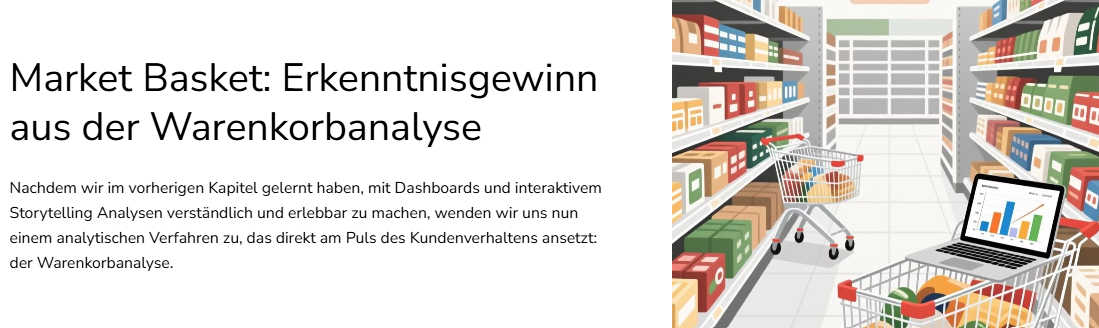

Die Grundidee der Warenkorbanalyse



Die Warenkorbanalyse untersucht, welche Produkte häufig zusammen gekauft werden. Diese einfache Idee hat weitreichende Konsequenzen für:

- Sortimentsplanung

- Produktplatzierung

- Personalisierte Empfehlungen

- Gezielte Marketingaktionen

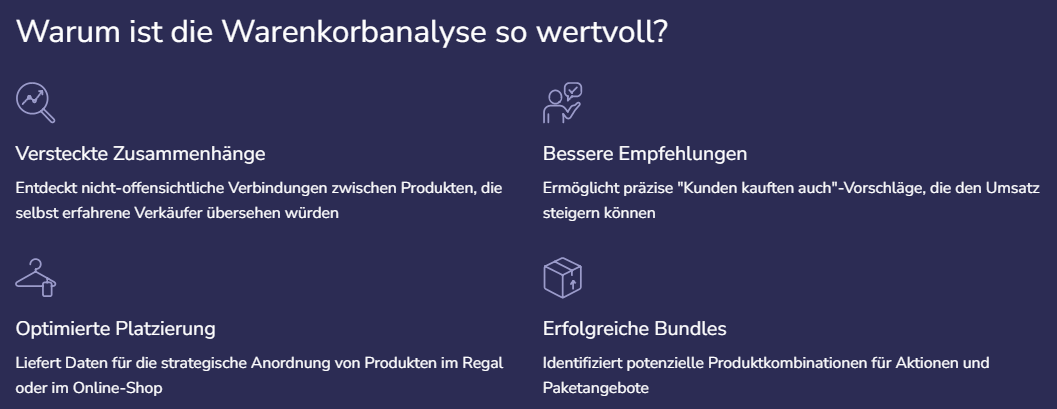

Das Prinzip geht über den Einzelhandel hinaus – es findet Anwendung in Bereichen wie E-Commerce, Streaming-Diensten (Filme, Songs) oder Produktion.


Die methodische Basis bilden Assoziationsregeln, die beschreiben, welche Artikelkombinationen besonders häufig auftreten. Typische Fragestellung: „Wenn Produkt A im Warenkorb liegt, wie wahrscheinlich ist es, dass auch Produkt B gekauft wird?“  

Hierbei sind drei Kennzahlen entscheidend:

Support – Wie oft tritt eine bestimmte Kombination in allen Transaktionen auf?

Confidence – Mit welcher Wahrscheinlichkeit wird B gekauft, wenn A gekauft wird?

Lift – Wie stark hängt der Kauf von B tatsächlich mit A zusammen, im Vergleich zum Zufall?





Der Apriori-Algorithmus ist die klassische Methode zur Identifizierung von Assoziationsregeln:

- Ermittlung häufiger Einzelartikel (über Schwellenwert)

- Kombination zu Artikelpaaren und Prüfung ihrer Häufigkeit

- Sukzessive Erweiterung zu größeren Kombinationen

- Ableitung von Assoziationsregeln aus häufigen Kombinationen  

Der Apriori-Algorithmus hilft dabei Muster in Daten zu finden, ohne dass eine Zielvariable vorhergesagt werden muss. Er deckt verborgene Zusammenhänge und Kaufgewohnheiten auf, die für Unternehmen enorm wertvoll sind.


In diesem Kapitel behandeln wir:

- Datenaufbereitung für Warenkorbanalysen

- Ermittlung von Assoziationsregeln mit dem Apriori-Algorithmus

- Interpretation von Support, Confidence und Lift




In [ ]:
import pandas as pd
data = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
# Wähle nur die ersten 100.000 Zeilen aus
data = data.head(1000)
data.head()

,SalesDate,SalesValue,SalesAmount,Customer,SalesTransactionID,SalesItem
0,2018-09-28,8280.0,10,0,0,0
1,2018-09-28,7452.0,10,0,0,0
2,2019-04-23,21114.0,30,0,1,0
3,2019-04-23,7038.0,10,0,1,1
4,2019-04-23,7000.0,2,0,1,2


## Apriori (FP Growth)


Assoziationsregeln helfen uns, die Menge der Artikel zu identifizieren, die bei Verkaufs-Transaktionen häufig zusammen auftreten (Warenkörbe). **Apriori** ist ein Algorithmus für das Frequent Pattern Mining, der sich auf die Generierung der häufigsten Artikel-Sets konzentriert. Apriori erzeugt Kandidaten-Artikel-Sets und muss sie mehrmals scannen, um den Support jedes Artikel-Sets zu überprüfen. Das ist extrem rechenintensiv. Aus diesem Grund werden wir im zweiten Versuch den **FP-Growth-Algorithmus** verwenden.

Ein Artikel-Set wird als **häufig** bezeichnet, wenn es einen minimalen Schwellenwert für **Support** und **Confidence** erfüllt. Support zeigt Transaktionen, in denen Artikel gemeinsam in einer einzigen Transaktion gekauft werden. Confidence zeigt Transaktionen, in denen die Artikel nacheinander gekauft werden.

Für die Methode des Frequent Itemset Mining (Suche nach häufigen Artikel-Sets) berücksichtigen wir nur jene Transaktionen, die die minimalen Schwellenwertanforderungen an Support und Confidence erfüllen. Die Erkenntnisse aus diesen Mining-Algorithmen bieten viele Vorteile wie Kostensenkung und einen verbesserten Wettbewerbsvorteil.

Es gibt einen Kompromiss zwischen der zum Mining benötigten Zeit und dem Datenvolumen für das Frequent Mining. Der Frequent Mining Algorithmus ist ein effizienter Algorithmus, um die versteckten Muster von Artikel-Sets innerhalb kurzer Zeit und mit geringem Speicherverbrauch zu finden.


Apriori ist ein Algorithmus zum Finden von **Assoziationsregeln**.
Er arbeitet nach dem Prinzip: **Untergruppen von häufigen Itemsets sind selbst häufig**.
Wir demonstrieren das an Einkäufen in einem kleinen Supermarkt.


## Schritt 1: Häufige Einzelartikel finden (Support)

Wir haben fünf Transaktionen (`min. support = 60%`, d. h. mindestens 3 von 5 Transaktionen):

* **T1:** Milch, Brot
* **T2:** Brot, Windeln
* **T3:** Milch, Windeln, Saft
* **T4:** Brot, Windeln, Saft
* **T5:** Milch, Brot, Windeln

Zählen wir die einzelnen Artikel:

* **Milch:** 3 Mal (60 %) → **häufig**
* **Brot:** 4 Mal (80 %) → **häufig**
* **Windeln:** 4 Mal (80 %) → **häufig**
* **Saft:** 2 Mal (40 %) → **nicht häufig**

Da Saft nicht häufig genug ist, werden alle Kombinationen mit Saft verworfen.
(Das ist das **Apriori-Prinzip**.)



## Schritt 2: Häufige Artikelpaare finden

Wir kombinieren die häufigen Artikel {Milch, Brot, Windeln}:

* **{Milch, Brot}**: T1, T5 → 2 Mal (40 %) → **nicht häufig**
* **{Milch, Windeln}**: T3, T5 → 2 Mal (40 %) → **nicht häufig**
* **{Brot, Windeln}**: T2, T4, T5 → 3 Mal (60 %) → **häufig**

Nur {Brot, Windeln} ist ein häufiges Paar.


## Schritt 3: Größere Kombinationen finden

Einzige mögliche Dreierkombination: **{Milch, Brot, Windeln}**

* Tritt nur in T5 auf → 1 Mal (20 %) → **nicht häufig**

Es gibt keine größeren häufigen Kombinationen mehr.



## Schritt 4: Assoziationsregeln ableiten (Confidence)

Wir können nur Regeln aus {Brot, Windeln} ableiten:

* **Regel 1: Brot → Windeln**
  Confidence = Support({Brot, Windeln}) / Support({Brot})
  \= 60 % / 80 % = **75 %**

* **Regel 2: Windeln → Brot**
  Confidence = Support({Brot, Windeln}) / Support({Windeln})
  \= 60 % / 80 % = **75 %**

Beide Regeln sind relativ stark, aber keine erreicht 100 %.



# Endergebnis

Die häufigsten Muster im Datensatz sind:

* Häufiges Itemset: **{Brot, Windeln}**
* Abgeleitete Regeln:

  * **Brot → Windeln (75 %)**
  * **Windeln → Brot (75 %)**



Mit diesen einfachen Schritten hat der Algorithmus die wichtigsten Assoziationsregeln gefunden, die zeigen, welche Artikel oft zusammen gekauft werden.

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Daten laden
data = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
data = data.head(1000)

# Nur relevante Spalten
df1 = data[['SalesTransactionID','SalesItem']]

# Basket-Matrix (Transaktionen × Items) mit Häufigkeiten.
basket = pd.crosstab(df1['SalesTransactionID'], df1['SalesItem'])
basket


SalesItem,0,1,2,3,4,5,6,7,8,9,...,373,374,375,376,377,378,379,380,381,382
SalesTransactionID,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
# Basket-Matrix in bool umwandeln
basket = (basket > 0)
basket

SalesItem,0,1,2,3,4,5,6,7,8,9,...,373,374,375,376,377,378,379,380,381,382
SalesTransactionID,,,,,,,,,,,,,,,,,,,,,
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


# Aufgabe: Handelt es sich hierbei um One-Hot-Encoding?

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Apriori
freq_items = apriori(basket, min_support=0.06, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.06)

print(freq_items.head())
print(rules.head())


    support itemsets
0  0.123077      (0)
1  0.061538      (4)
2  0.123077      (6)
3  0.061538      (7)
4  0.107692      (8)
  antecedents consequents  antecedent support  consequent support   support  \
0        (13)         (6)            0.123077            0.123077  0.061538   
1         (6)        (13)            0.123077            0.123077  0.061538   
2        (17)         (6)            0.200000            0.123077  0.076923   
3         (6)        (17)            0.123077            0.200000  0.076923   
4        (20)         (6)            0.246154            0.123077  0.092308   

   confidence      lift  representativity  leverage  conviction  \
0    0.500000  4.062500               1.0  0.046391    1.753846   
1    0.500000  4.062500               1.0  0.046391    1.753846   
2    0.384615  3.125000               1.0  0.052308    1.425000   
3    0.625000  3.125000               1.0  0.052308    2.133333   
4    0.375000  3.046875               1.0  0.062012    1.403077 

In [ ]:
rules.to_excel('Export&Supportvalues.xlsx')

# Aufgabe: Interpretieren Sie die Ergebnisse

# Zusammenfassung Apriori

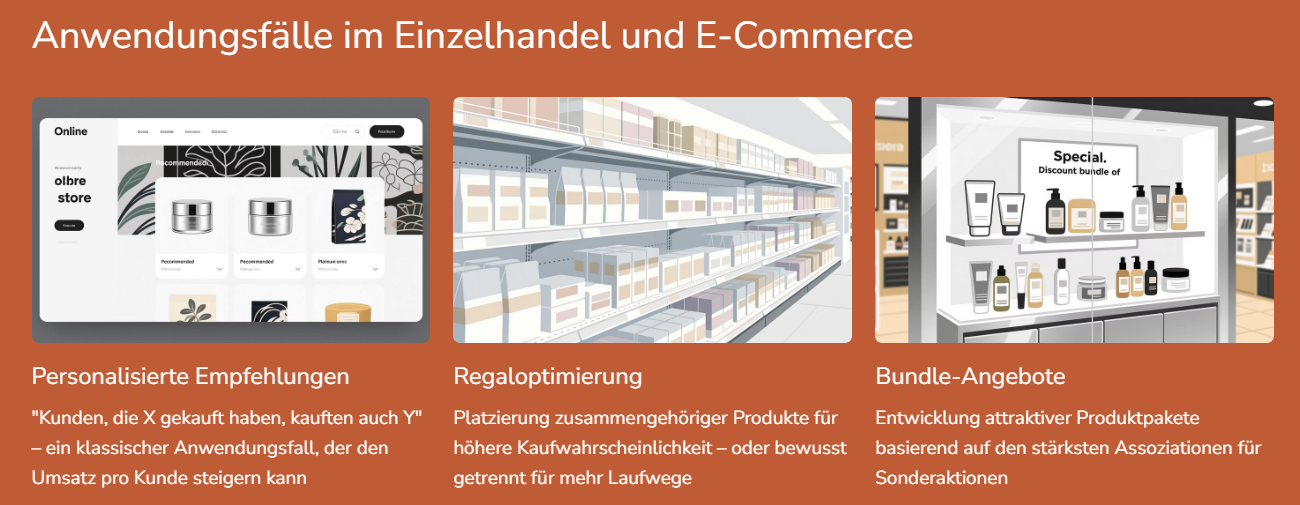

# Zusammenfassung:

# Feature Engineering
Die Regeln, die Apriori generiert, können als neue Features für ein Machine-Learning-Modell dienen.
* **Feature-Erstellung:** Eine Assoziationsregel wie "Käufer von Produkt A und B neigen dazu, auch Produkt C zu kaufen" kann in ein binäres Feature (`kauft_a_und_b_zusammen`) umgewandelt werden. Dieses neue Feature kann die Leistung von Klassifikations- oder Clustering-Modellen verbessern.

# Interpretierbarkeit
Im Gegensatz zu komplexen Modellen wie neuronalen Netzen, deren Entscheidungen oft schwer nachvollziehbar sind (Black Box), sind die von Apriori generierten Assoziationsregeln **vollständig interpretierbar**.
* **Klare Regeln:** Eine Regel wie `A -> B` ist einfach zu verstehen und direkt in Geschäftsentscheidungen umsetzbar. Manager können sofort erkennen, welche Produkte zusammengehören, und ihre Marketingstrategien oder Produktplatzierung entsprechend anpassen.

